In [2]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
esmFeatures = pd.read_csv('C:/data/processed/ESM_pilot/features.csv',index_col=False)

In [5]:
esmColumns = ['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired',
       'mood_cheerf', 'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where',
       'soc_who', 'soc_who02', 'soc_who03', 'act_what', 'act_what02',
       'act_what03', 'act_norpob', 'prob_mobility', 'prob_stillness',
       'prob_speech', 'prob_walking', 'tremor', 'slowness',
       'stiffness', 'tension', 'dyskinesia', 'onoff',
       'medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n', 'beepno_n','duration']

In [6]:
esmFeatures.keys()

Index(['BandPowerXL', 'BandPowerYL', 'BandPowerZL', 'DomFreqXL',
       'DomEnergyRatioXL', 'RMSXL', 'AmpRangeXL', 'DomFreqYL',
       'DomEnergyRatioYL', 'RMSYL', 'AmpRangeYL', 'DomFreqZL',
       'DomEnergyRatioZL', 'RMSZL', 'AmpRangeZL', 'MaxCCL', 'MaxCCLocL',
       'BandPowerXR', 'BandPowerYR', 'BandPowerZR', 'DomFreqXR',
       'DomEnergyRatioXR', 'RMSXR', 'AmpRangeXR', 'DomFreqYR',
       'DomEnergyRatioYR', 'RMSYR', 'AmpRangeYR', 'DomFreqZR',
       'DomEnergyRatioZR', 'RMSZR', 'AmpRangeZR', 'MaxCCR', 'MaxCCLocR',
       'BandPowerXC', 'BandPowerYC', 'BandPowerZC', 'DomFreqXC',
       'DomEnergyRatioXC', 'RMSXC', 'AmpRangeXC', 'DomFreqYC',
       'DomEnergyRatioYC', 'RMSYC', 'AmpRangeYC', 'DomFreqZC',
       'DomEnergyRatioZC', 'RMSZC', 'AmpRangeZC', 'MaxCCC', 'MaxCCLocC',
       'subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 

In [7]:
esmFeatures.index

RangeIndex(start=0, stop=1035, step=1)

C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in

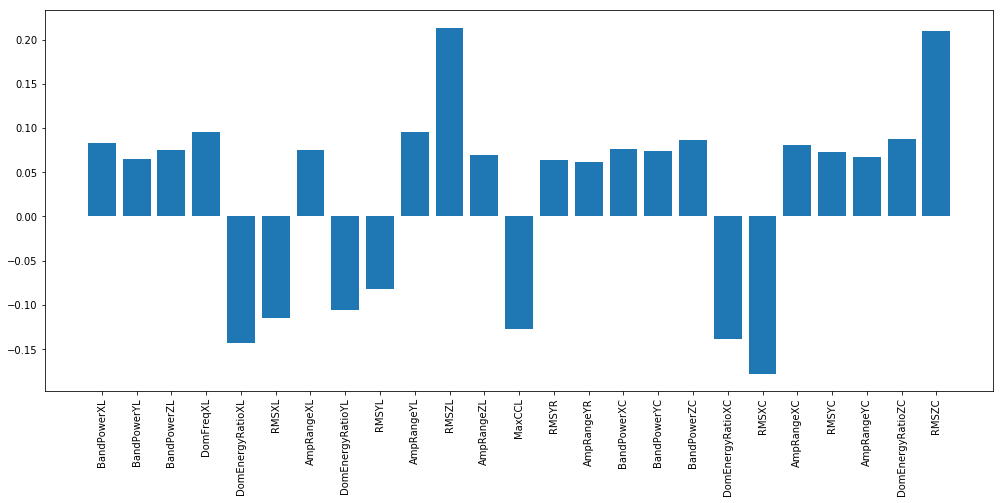

In [11]:
#dat = esmFeatures.filter(regex=r'(l|r|c)$')
#dat = dat.filter(regex=r'^((?!sanpar).)*$')
dat = esmFeatures.drop(esmColumns,axis=1)
feats = list(dat.keys())
rs = np.zeros((len(feats)))
ps = np.zeros((len(feats)))
for i,f in enumerate(feats):
    rs[i], ps[i] = spearmanr(esmFeatures['dyskinesia'],dat[f])

fig = plt.figure(0,(17,7))
plt.bar(np.array(feats)[ps<0.05],rs[ps<0.05])
plt.xticks(rotation=90)
plt.show()


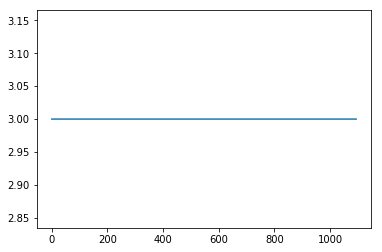

In [46]:
plt.plot(esmFeatures['sanpar_onoff'])

In [41]:
# Spearman Correlations
r, p = spearmanr(esmFeatures['sanpar_stijf'],esmFeatures['sanpar_traag'])
print('Spearman correlation of r = %f with a p-value of %f' % (r, p))

Spearman correlation of r = 0.515480 with a p-value of 0.000000


In [14]:
### Use Machine Learning to predict some variable from the esm

# Linear Regression

lr = LinearRegression()
# Fitting the linear regression to the data
lr.fit(esmFeatures[['BandPowerXR','BandPowerYL']].values,esmFeatures['tremor'])
# Looking at model parameters
# Regression weights
print('Weights are %f, %f' % (lr.coef_[0], lr.coef_[1]))
# Intercept
print('Intercept is %f' % lr.intercept_)

# Predict target variable based on input data (should be unseen data)
prediction = lr.predict(esmFeatures[['BandPowerXr','BandPowerYl']].values)


Weights are -0.136416, 0.271736
Intercept is 0.711235


KeyError: "['BandPowerXr' 'BandPowerYl'] not in index"

In [ ]:
### Data visualization
# Bar plot
fig,ax = plt.subplots()
ax.bar(range(3), lr.coef_,color='r',width=0.4)
ax.bar(np.arange(3)+0.4, lr.coef_+0.01, color='b',width=0.4)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Linear Regression Weights')
plt.xticks(range(3),['BandPowerXR','BandPowerYL', '#MovementsXL'])
plt.yticks(np.arange(0,0.1,0.02))
plt.savefig('weights.png',dpi=60)
plt.show()

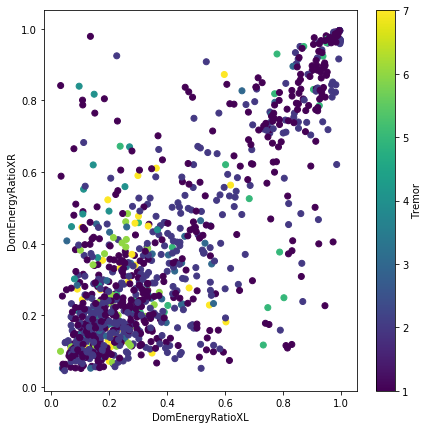

In [17]:
# Scatter Plot
feature1='DomEnergyRatioXL'
feature2='DomEnergyRatioXR'
fig, ax = plt.subplots(figsize=(7,7))
s1 = ax.scatter(esmFeatures[feature1], esmFeatures[feature2], c=esmFeatures['tremor'])
plt.xlabel(feature1)
plt.ylabel(feature2)
fig.colorbar(s1,label='Tremor')
plt.show()

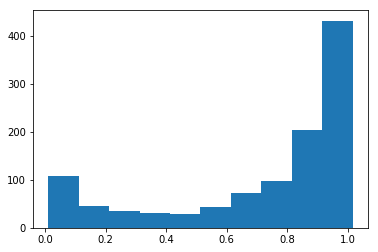

In [20]:
# Histogram
plt.hist(esmFeatures['RMSXc'])
plt.show()

In [21]:
# Principal Component Analysis
def pca(data):
    # Calculate Covariance Matrix
    cov=np.cov(data.T)
    # Calculate Eigenvalues and Eigenvectors
    w, v = np.linalg.eig(cov)
    # Sort them
    s= np.argsort(w)[::-1]
    return v[:,s]

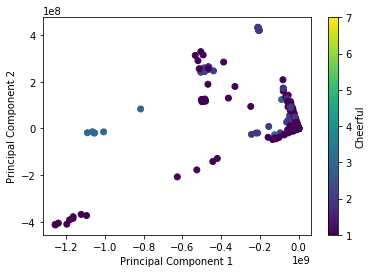

In [24]:
# Could also be done in only sensor/esm spaces
dat = esmFeatures.filter(regex=r'(l|r|c)$').values.astype(float)
esmEigenVectors = pca(dat)
transformedFeatureSpace =np.dot(esmEigenVectors[:,:2].T,dat.T).T
s1 = plt.scatter(transformedFeatureSpace[:,0],transformedFeatureSpace[:,1],c=esmFeatures['sanpar_tremor'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(s1, label = 'Cheerful')
plt.show()

In [ ]:
## It is very easy to use a more powerful Machine Learning algorithm


est = GradientBoostingRegressor()
# Fitting the regression model to our data
est.fit(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values,esmFeatures['stress'])

# Interpreting the model
print(est.feature_importances_)

# Predict target variable based on input data (should be unseen data)
prediction = est.predict(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values)

In [ ]:
### Experiments with Orientation estimation
signal_labels, timeStamps, sigbufs, sr = readData(leftWristFile)

### Transform Gyro data into orientation estimation
from madgwickahrs import MadgwickAHRS
mw = MadgwickAHRS(sampleperiod=1/sr)
euler = np.zeros((3,sigbufs.shape[1]))
for sample in range(sigbufs.shape[1]):
    mw.update_imu(sigbufs[6:,sample],sigbufs[3:6,sample])
    euler[:,sample] = mw.quaternion.to_euler123()

plt.matshow(euler,aspect='auto')
plt.yticks([0,1,2],['Roll', 'Pitch', 'Yaw'])
plt.xlabel('Time in samples')
plt.show()